#  <span style="color:orange">二元分类教程 (CLF101) - 初级</span>

**使用版本: PyCaret 2.2** <br />
**更新时间: 2020年11月11**

# 1.0 教程简介
欢迎阅读二元分类的初级教程**(CLF101)**. 本教程使用`pycaret.classification`模块来介绍二元分类的基本操作，面向的读者是PyCaret的新手。

在本教程中你会学到:


* **获取数据:** 如何从PyCaret中获取数据？
* **环境搭建:** 如何搭建二元分类所需的必要环境？
* **创建模型:**  如何创建模型、执行分层交叉验证和评估分类指标？
* **调参数:**  如何自动调超参数？
* **模型性能图:**  如何使用多种图像来分析模型的性能？
* **最终模型:** 如何选择最佳的最终模型？
* **预测:** 如何用训练好的模型来预测新的数据集？
* **保存/加载模型:**  如何保存/加载模型以便之后使用？

阅读时间 : 大约30分钟


# 1.1 安装 PyCaret
安装PyCaret一般只需要几分钟。请按照以下说明进行操作。

# 在本地 Jupyter Notebook 安装 PyCaret
`pip install pycaret`  <br />

# 在 Google Colab 或者 Azure Notebooks 安装 PyCaret
`!pip install pycaret`


# 1.2 预先要求
- Python 3.6 或更高
- PyCaret 2.0 或更高
- 网络链接来获取PyCaret中的数据
- 异常检测的基础知识

# 1.3 Google Colab 用户:
如何你在 Google Colab跑这个Notebook, 请运行以下代码来显示交互式的图像。<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 1.4 其他阅读资料:
- __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__
- __[Binary Classification Tutorial (CLF103) - Expert Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__

# 2.0 什么是二元分类？
二元分类是一种有监督的机器学习技术，其目标是预测离散和无序的分类标签，例如通过/失败、正/负、默认/非默认等。下面列出了一些现实生活中的例子：

- 用于确定患者是否患有某种疾病的医学测试 - 疾病是否存在。
- 工厂中的“通过或失败”测试方法或质量控制，即确定是否满足规范 - 通过/不通过。
- 信息检索，即决定一个页面或一篇文章是否应该在搜索的结果集中 - 分类属性是文章的相关性，或者对用户的有用性。

__[更多资料](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 3.0 PyCaret的分类模块概述
PyCaret 的分类模块（`pycaret.classification`）是一个有监督的机器学习模块，用于根据各种技术和算法将元素分类为二进制组。分类问题的一些常见用例包括预测客户违约（是或否）、客户流失（客户将离开或留下）、发现疾病（正面或负面）。


PyCaret 分类模块可用于二分类或多分类问题。它有超过 18 种算法和 14 个图来分析模型的性能。无论是超参数调整、集成还是堆叠等高级技术，PyCaret 的分类模块都应有尽有。

# 4.0 教程数据集

在本教程中，我们将使用来自 UCI 的数据集，称为**信用卡客户数据集的默认值**。该数据集包含 2005 年 4 月至 2005 年 9 月期间台湾国信用卡客户的违约付款、人口统计因素、信用数据、付款历史和帐单等信息。有 24,000 个样本和 25 个特征。每列的简短描述如下：

- **ID:** 每个客户的 ID
- **LIMIT_BAL:** 以新台币计的信贷金额（包括个人和家庭/补充信贷）
- **SEX:** 性别（1=男性，2=女性）
- **EDUCATION:** （1=研究生院，2=大学，3=高中，4=其他，5=未知，6=未知）
- **MARRIAGE:** 婚姻状况（1=已婚，2=单身，3=其他）
- **AGE:** 年龄
- **PAY_0 to PAY_6:** n 个月前的还款状态（PAY_0 = 上个月 ... PAY_6 = 6 个月前）（标签：-1=按时付款，1=延迟付款一个月，2=延迟付款两个月，... 8=付款延迟八个月，9=付款延迟九个月及以上）
- **BILL_AMT1 to BILL_AMT6:** n 个月前的账单金额（BILL_AMT1 = last_month .. BILL_AMT6 = 6 个月前）
- **PAY_AMT1 to PAY_AMT6:** n 个月前的付款金额（BILL_AMT1 = last_month .. BILL_AMT6 = 6 个月前）
- **default:** 默认付款（1=是，0=否） `Target Column`

# 数据集作者与联系方式:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

 __[原始数据集链接](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ 

# 5.0 获取数据

你可以选择下载数据 （__[下载链接](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__），并用pandas来加载 __[(pandas教程)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__。 或者你可以使用 PyCaret的`get_data()` 函数来获取数据 （需要网络链接）。

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
#查看数据的形状
dataset.shape

(24000, 24)

为了用看不见的数据来演示`predict_model()` 函数，我们在原始数据集中保留了 1200 条记录的样本以用于预测。这不应与训练/测试拆分混淆，因为执行此特定拆分是为了模拟现实生活场景。另一种思考方式是，在执行机器学习实验时，这 1200 条记录不可用。

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# 6.0 配置 PyCaret 环境

`setup()` 函数在 PyCaret 中初始化环境并创建转换管道以准备数据并进行建模和部署。 `setup()` 必须在执行 PyCaret 中的任何其他函数之前调用。它需要两个强制性参数：pandas dataframe，和目标列的名称。所有其他参数都是可选的，用于自定义预处理管道（我们将在后面的教程中看到它们）。

当 `setup()` 被执行时，PyCaret 的推理算法会根据某些属性自动推断所有特征的数据类型。通常PyCaret会正确地推断数据类型，但情况并非总是如此。为了解决这个问题，PyCaret 会在执行 setup() 后显示一个包含特征及其推断数据类型的表。如果所有数据类型都被正确识别，可以按“enter”继续，或者可以输入“quit”结束实验。确保数据类型正确在 PyCaret 中至关重要，因为它会自动执行一些预处理任务，这对于任何机器学习实验都是必不可少的。对于每种数据类型，这些任务的执行方式不同，这意味着正确配置它们非常重要。

在后面的教程中，我们将学习如何使用 `setup()` 中的 `numeric_features` 和 `categorical_features` 参数覆盖 PyCaret 的推断数据类型。

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


成功执行设置后，它会打印包含几条重要信息的信息网格。大部分信息与执行 setup() 时构建的预处理管道有关。这些功能中的大部分都超出了本教程的范围，但是在此阶段需要注意的一些重要事项包括：

- **session_id:**  一个自定义的数字作为种子，这在之后用于再现结果。如果`session_id`没有被传入，一个随机数会被生成。在这次试验中，我们使用`123`作为种子。<br/>
<br/>
- **Target Type:**  二进制或多类。目标类型会自动检测并显示。对于二元或多类问题，实验的执行方式没有区别。所有功能都是相同的。<br/>
<br/>
- **Label Encoded :**  当目标变量是字符串类型（即“是”或“否”）而不是 1 或 0 时，它会自动将标签编码为 1 和 0，并显示映射（0：否，1：是）以供参考。在这个实验中，不需要标签编码，因为目标变量是数字类型的。 <br/>
<br/>
- **Original Data :**  显示数据集的原始形状。在这个实验中 (22800, 24) 意味着 22,800 个样本和 24 个特征（包括目标列）。 <br/>
<br/>
- **Missing Values 缺失值:**  当原数据中存在缺失值时，该项会显示`True`，PyCaret会自动使用`mean`来填充数字，`constant`来填充类别。这些填充方法都可以使用 `numeric_imputation`和`categorical_imputation`参数在`setup()`中设置。 <br/>
<br/>
- **Numeric Features :**  推断为数字的特征数量。在这个数据集中，24 个特征中有 14 个被推断为数字。 <br/>
<br/>
- **Categorical Features :**  推断为分类的特征数量。在这个数据集中，24 个特征中有 9 个被推断为分类特征。<br/>
<br/>
- **Transformed Train Set :**  显示转换后的训练集的形状。请注意，对于变换后的训练集，(22800, 24) 的原始形状被转换为 (15959, 91)，并且由于分类编码，特征数量从 24 个增加到 91 个 <br/>
<br/>
- **Transformed Test Set :**  显示转换后的测试/保持集的形状。测试/保留集中有 6841 个样本。此拆分基于默认值 70/30，可以使用 setup 中的 `train_size` 参数进行更改。 <br/>

# 7.0 模型比较

比较所有模型以评估性能是在设置完成后建模的起点（除非你确切知道需要哪种模型，但通常情况并非如此）。此函数训练模型库中的所有模型，并使用分层交叉验证对它们进行评分以进行度量评估。输出打印一个分数网格，显示平均准确率、AUC、召回率、精度、F1、Kappa 和 MCC 跨折叠（默认为 10）以及训练时间。

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0490
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1880
gbc,Gradient Boosting Classifier,0.8225,0.7790,0.3548,0.6800,0.4661,0.3721,0.4005,2.0260
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.4990
lightgbm,Light Gradient Boosting Machine,0.8220,0.7759,0.3591,0.6745,0.4685,0.3734,0.4003,0.2180
rf,Random Forest Classifier,0.8180,0.7618,0.3591,0.6531,0.4631,0.3645,0.3884,0.8030
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,2.0060
et,Extra Trees Classifier,0.8082,0.7381,0.3669,0.6010,0.4553,0.3471,0.3629,0.8700
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.7680
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.3000


两个简单的代码词***（甚至不是一行）***已经使用交叉验证训练和评估了超过 15 个模型。上面打印的分数网格突出显示了性能最高的指标，仅用于比较目的。默认情况下，网格使用 'Accuracy'（从最高到最低）排序，可以通过传递 `sort` 参数来更改。例如，`compare_models(sort = 'Recall')` 将按 Recall 而不是 Accuracy 对网格进行排序。如果要将 fold 参数从默认值 `10` 更改为不同的值，则可以使用 `fold` 参数。例如 `compare_models(fold = 5)` 将在 5 折交叉验证上比较所有模型。减少折叠次数将改善训练时间。默认情况下，`compare_models` 根据默认排序顺序返回性能最佳的模型，但可用于通过使用 `n_select` 参数返回前 N 个模型的列表。

In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# 8.0 创建模型

`create_model` 是 PyCaret 中最精细的函数，通常是大多数 PyCaret 功能背后的基础。顾名思义，此函数使用可以使用“折叠”参数设置的交叉验证来训练和评估模型。输出打印一个分数网格，按折叠显示 Accuracy、AUC、Recall、Precision、F1、Kappa 和 MCC。

对于本教程的剩余部分，我们将使用以下模型作为我们的候选模型。这些选择仅用于说明目的，并不一定意味着它们是此类数据的最佳表现或理想选择。

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

PyCaret 的模型库中有 18 个分类器可用。要查看所有分类器的列表，请检查 `docstring` 或使用 `models` 函数查看库。

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# 8.1 决策树分类器

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7331,0.6239,0.4298,0.3979,0.4132,0.2408,0.2411
1,0.7325,0.6359,0.4642,0.4030,0.4314,0.2576,0.2587
2,0.7419,0.6254,0.4183,0.4113,0.4148,0.2492,0.2492
3,0.7256,0.6116,0.4097,0.3813,0.3950,0.2179,0.2181
4,0.7124,0.6127,0.4355,0.3671,0.3984,0.2113,0.2126
5,0.7193,0.6111,0.4155,0.3728,0.3930,0.2111,0.2116
6,0.7212,0.6098,0.4126,0.3750,0.3929,0.2125,0.2129
7,0.7287,0.5932,0.3524,0.3727,0.3623,0.1902,0.1903
8,0.7105,0.5898,0.3754,0.3493,0.3619,0.1750,0.1752
9,0.7373,0.6207,0.4138,0.4011,0.4074,0.2387,0.2387


In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 8.2 K 邻居分类器

In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


# 8.3 随机森林分类器

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8114,0.7666,0.3467,0.6237,0.4457,0.3430,0.3645
1,0.8264,0.7527,0.3897,0.6800,0.4954,0.3998,0.4224
2,0.8258,0.7701,0.3496,0.7052,0.4674,0.3772,0.4104
3,0.8195,0.7662,0.3754,0.6517,0.4764,0.3768,0.3977
4,0.8177,0.7654,0.3524,0.6543,0.4581,0.3601,0.3851
5,0.8283,0.7750,0.3897,0.6904,0.4982,0.4041,0.4282
6,0.8076,0.7717,0.3352,0.6094,0.4325,0.3283,0.3495
7,0.8195,0.7401,0.3381,0.6743,0.4504,0.3564,0.3868
8,0.8095,0.7461,0.3582,0.6098,0.4513,0.3453,0.3632
9,0.8144,0.7643,0.3563,0.6327,0.4559,0.3544,0.3756


请注意，所有模型的平均分数与 `compare_models()` 中打印的分数相匹配。这是因为在 `compare_models()` 得分网格中打印的指标是所有 CV 折叠的平均得分。与 `compare_models()` 类似，如果要将 fold 参数从默认值 10 更改为不同的值，则可以使用 `fold` 参数。例如：`create_model('dt', fold = 5)` 将使用 5 折分层 CV 创建决策树分类器。

# 9.0 调参数

当使用 `create_model()` 函数创建模型时，它使用默认超参数来训练模型。为了调整超参数，使用了 `tune_model()` 函数。此功能使用“随机网格搜索”在预定义的搜索空间上自动调整模型的超参数。输出打印一个分数网格，按折叠显示准确度、AUC、召回率、精度、F1、Kappa 和 MCC，以获得最佳模型。要使用自定义搜索网格，您可以在 `tune_model` 函数中传递 `custom_grid` 参数（请参阅下面的 9.2 KNN 调整） <br/>
<br/>

# 9.1 决策树分类器

In [13]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801
9,0.8188,0.7378,0.3075,0.6903,0.4254,0.3362,0.3751


In [14]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 9.2 K 邻居分类器

In [15]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146
9,0.7881,0.6426,0.0661,0.6389,0.1198,0.0822,0.1548


In [16]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


# 9.3 随机森林分类器

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7513,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7529,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699
9,0.8207,0.7484,0.3132,0.6987,0.4325,0.3439,0.3831


默认情况下，`tune_model` 会优化 `Accuracy`，但这可以使用 `optimize` 参数进行更改。例如：`tune_model(dt, optimize = 'AUC')` 将搜索决策树分类器的超参数，它会导致最高的 `AUC` 而不是 `Accuracy`。出于本示例的目的，我们使用默认指标“准确度”只是为了简单起见。通常，当数据集不平衡时（例如我们正在使用的信用数据集），“准确性”不是一个很好的考虑指标。选择正确指标来评估分类器的方法超出了本教程的范围，但如果您想了解更多信息，可以__[点击此处](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__来阅读有关如何选择正确评估指标的文章。

在最终确定最佳生产模型时，指标本身并不是您应该考虑的唯一标准。其他要考虑的因素包括训练时间、kfolds 的标准差等。随着您学习本教程系列，我们将在中级和专家级别详细讨论这些因素。现在，让我们继续考虑调整随机森林分类器“tuned_rf”，作为本教程其余部分的最佳模型。

# 10.0 绘制模型

在模型最终确定之前，`plot_model()` 函数可用于分析不同方面的性能，例如 AUC、confusion_matrix、决策边界等。此函数采用经过训练的模型对象并返回基于测试/保留的图放。

有 15 种不同的图可用，请参阅 `plot_model()` 文档字符串以获取可用图的列表。

# 10.1 AUC 曲线

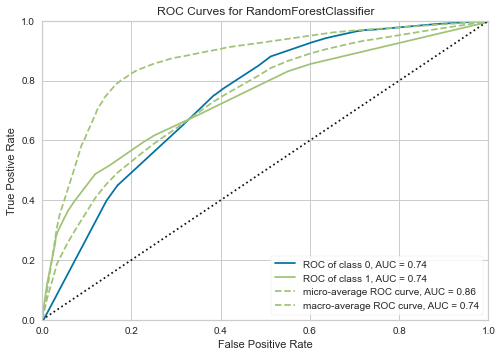

In [18]:
plot_model(tuned_rf, plot = 'auc')

# 10.2 精确召回曲线

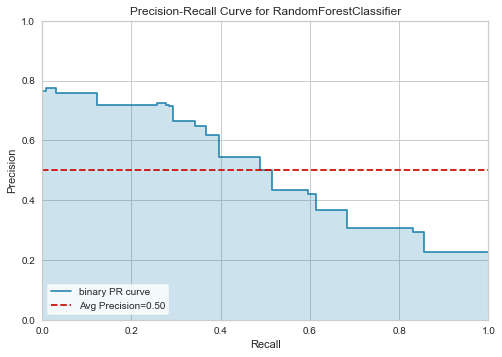

In [19]:
plot_model(tuned_rf, plot = 'pr')

# 10.3 特征重要性图

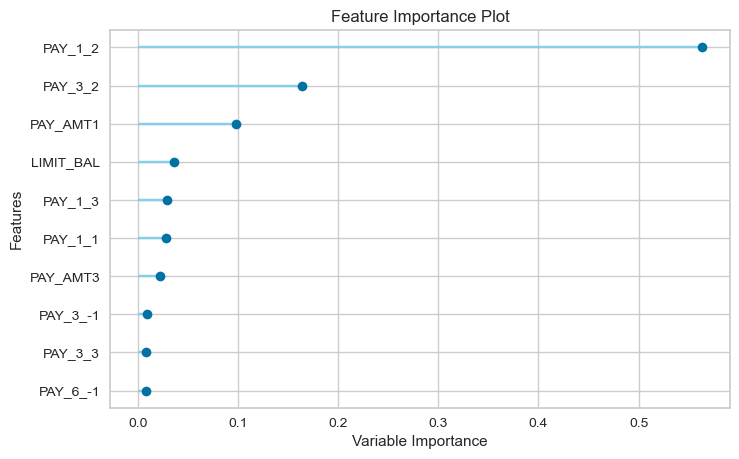

In [20]:
plot_model(tuned_rf, plot='feature')

# 10.4 混淆矩阵

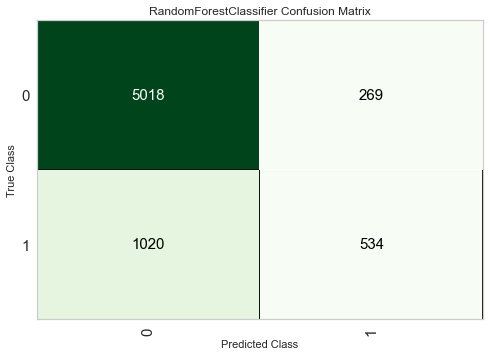

In [21]:
plot_model(tuned_rf, plot = 'confusion_matrix')

另一种分析模型性能的方法是使用 `evaluate_model()` 函数，该函数显示给定模型的所有可用图的用户界面。它在内部使用 `plot_model()` 函数。

In [22]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 在保留样本上测试

在最终确定模型之前，建议通过预测测试/保留集并查看评估指标来执行最终检查。如果您查看上面第 6 节中的信息网格，您将看到 30%（6,841 个样本）的数据已作为测试/保留样本分离出来。我们在上面看到的所有评估指标都是仅基于训练集 (70%) 的交叉验证结果。现在，使用存储在 `tuned_rf` 变量中的最终训练模型，我们将针对保留样本进行预测并评估指标，以查看它们是否与 CV 结果存在重大差异

In [23]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


测试/保持集的准确度是 **`0.8116`** 与 **`0.8203`** 在 `tuned_rf` CV 结果（在上面的第 9.3 节中）上实现的。这不是一个显着的区别。如果测试/保留结果和 CV 结果之间存在很大差异，则这通常表明过度拟合，但也可能是由于其他几个因素，需要进一步调查。在这种情况下，我们将继续完成模型并预测看不见的数据（我们在开始时分离并且从未暴露于 PyCaret 的 5%）。

（提示：使用 `create_model()` 时查看 CV 结果的标准差总是好的。）

# 12.0 最终确定部署模型

模型定型是实验的最后一步。 PyCaret 中的正常机器学习工作流程从“setup()”开始，然后使用“compare_models()”比较所有模型，并列出一些候选模型（基于感兴趣的指标）以执行多种建模技术，例如超参数调整，集成、堆叠等。此工作流程最终将引导您找到用于对新的和未见过的数据进行预测的最佳模型。 `finalize_model()` 函数将模型拟合到完整的数据集上，包括测试/保留样本（在这种情况下为 30%）。此功能的目的是在将模型部署到生产环境之前在完整数据集上训练模型。

In [24]:
final_rf = finalize_model(tuned_rf)

In [25]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


**警告：** 使用 finalize_model() 完成模型后，包括测试/保留集在内的整个数据集将用于训练。因此，如果在使用 `finalize_model()` 后模型用于对保留集的预测，则打印的信息网格将具有误导性，因为您试图在用于建模的相同数据上进行预测。为了证明这一点，我们将使用 `predict_model()` 下的 `final_rf` 将信息网格与上面第 11 节中的信息网格进行比较。

In [29]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


请注意 `final_rf` 中的 AUC 如何从 **`0.7407`** 增加到 **`0.7526`**，即使模型相同。这是因为 `final_rf` 变量已经在包括测试/保留集在内的完整数据集上进行了训练。

# 13.0 预测新数据

`predict_model()` 函数也用于在看不见的数据集上进行预测。与上面第 11 节的唯一区别是，这次我们将传递 `data_unseen` 参数。 `data_unseen` 是在教程开始时创建的变量，包含 5%（1200 个样本）的原始数据集，从未暴露给 PyCaret。 （解释见第 5 节）

In [30]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


`Label` 和 `Score` 列被添加到 `data_unseen` 集合中。标签是预测，分数是预测的概率。请注意，预测结果会连接到原始数据集，而所有转换都是在后台自动执行的。您还可以检查这方面的指标，因为您有实际的目标列“默认”可用。为此，我们将使用 `pycaret.utils` 模块。请参见下面的示例：

In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8167

# 14.0 保存模型

我们现在已经通过最终确定存储在 `final_rf` 变量中的 `tuned_rf` 模型完成了实验。我们还使用 `final_rf` 中存储的模型来预测 `data_unseen`。这使我们的实验结束，但仍有一个问题要问：当您有更多新数据要预测时会发生什么？您是否必须再次完成整个实验？答案是否定的，PyCaret 的内置函数 `save_model()` 允许您将模型与整个转换管道一起保存以供以后使用。

In [32]:
save_model(final_rf,'Final RF Model 11Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

（提示：保存模型时最好在文件名中使用日期，这有利于版本控制。）

# 15.0 加载保存的模型

要在未来某个日期在相同或替代环境中加载保存的模型，我们将使用 PyCaret 的 `load_model()` 函数，然后轻松地将保存的模型应用于新的看不见的数据进行预测。

In [33]:
saved_final_rf = load_model('Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Loaded


在环境中加载模型后，你可以使用相同的`predict_model()`函数简单地使用它来预测任何新数据。下面我们应用加载的模型来预测我们在上面第 13 节中使用的相同的`data_unseen`。

In [34]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [35]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


请注意，`unseen_predictions` 和 `new_prediction` 的结果是相同的。

In [36]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8167

# 16.0 总结/下一步

本教程涵盖了从数据摄取、预处理、模型训练、超参数调整、预测和保存模型以备后用的整个机器学习管道。我们在不到 10 个命令中完成了所有这些步骤，这些命令是自然构造的并且非常容易记住，例如`create_model()`、`tune_model()`、`compare_models()`。在大多数库中，如果不使用 PyCaret 重新创建整个实验，将需要 100 多行代码。

__[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__